In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path
sys.path.insert(1, str(Path(os.getcwd()).parent / "src"))

In [3]:
import numpy as np
import pmcx
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'notebooks'

In [20]:
mu_s_bounds = np.concatenate((
    np.array([4.8 * (wl / 500) ** (-3.089) for wl in [450, 1000]]),
    np.array([2.2 * (wl / 500) ** (-0.660) for wl in [450, 1000]])
))
mu_s_bounds / (1 - 0.9)

array([66.46394657,  5.64104522, 23.58428012, 13.92332253])

In [21]:
mu_s_vals = np.linspace(1, 100, 25)
print(mu_s_vals)

[  1.      5.125   9.25   13.375  17.5    21.625  25.75   29.875  34.
  38.125  42.25   46.375  50.5    54.625  58.75   62.875  67.     71.125
  75.25   79.375  83.5    87.625  91.75   95.875 100.   ]


In [22]:
pmcx.version()

'v2025'

###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

In [23]:
pmcx.gpuinfo()

[{'name': 'NVIDIA GeForce GTX 1060 6GB',
  'id': 1,
  'devcount': 1,
  'major': 6,
  'minor': 1,
  'globalmem': 6364725248,
  'constmem': 65536,
  'sharedmem': 49152,
  'regcount': 65536,
  'clock': 1784500,
  'sm': 10,
  'core': 1280,
  'autoblock': 64,
  'autothread': 20480,
  'maxgate': 0}]

=============================   GPU Information  ================================
Device 1 of 1:		NVIDIA GeForce GTX 1060 6GB
Compute Capability:	6.1
Global Memory:		6364725248 B
Constant Memory:	65536 B
Shared Memory:		49152 B
Registers:		65536
Clock Speed:		1.78 GHz
Number of SMs:		10
Number of Cores:	1280
Auto-thread:		20480
Auto-block:		64


In [36]:
data_path = Path("/media/nagel/T7/IDP/mcs_function_data/function_data.npz")
os.makedirs(data_path.parent, exist_ok=True)


In [25]:
vol = np.ones((60, 60, 600))
prop = np.array([[0, 0, 1, 1], [0, 0, 0.9, 1.38]])
cfg = {
    "nphoton": 1e6,
    "maxdetphoton": 1e6,
    "vol": vol,
    "tstart":0,
    "tend":5e-7,
    "tstep":5e-7,
    "autopilot": 1,
    "gpuid": 1,
    "prop":prop,
    "bc": "ccrcca001000", # mark z=0 plane as detector
    "srcdir": [0,0,1],
    "srctype": "planar",
    "srcpos": [0, 0, 0],
    "srcparam1": [vol.shape[0], 0, 0, 0], # 3D position of vertex, fourth coordinate is irrelevant
    "srcparam2": [0, vol.shape[1], 0, 0],
    "issrcfrom0": 1,
    "savedetflag": "dps", # detector id, path length, scatter count
    "flog": "/home/nagel/Desktop/log.txt",
    "unitinmm":1
}

In [26]:
save_data = []
save_data.append(cfg["nphoton"])
save_data.append(mu_s_vals)

In [27]:
for i, mu_s in enumerate(mu_s_vals):
    cfg["prop"][1, 1] = mu_s
    print(f"mu_s: {mu_s}....")
    res = pmcx.mcxlab(cfg)
    cur_photon_data = np.row_stack(
        (
            res["detp"]["ppath"][:, 0],
            res["detp"]["nscat"][:, 0]
        )
    )
    save_data.append(cur_photon_data)
    np.savez(data_path, *save_data)

mu_s: 1.0....
nphoton: 1e+06
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 1e+06
issrcfrom0: 1
autopilot: 1
unitinmm: 1
mu_s: 5.125....
nphoton: 1e+06
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 1e+06
issrcfrom0: 1
autopilot: 1
unitinmm: 1
mu_s: 9.25....
nphoton: 1e+06
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 1e+06
issrcfrom0: 1
autopilot: 1
unitinmm: 1
mu_s: 13.375....
nphoton: 1e+06
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 1e+06
issrcfrom0: 1
autopilot: 1
unitinmm: 1
mu_s: 17.5....
nphoton: 1e+06
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 1e+06
issrcfrom0: 1
autopilot: 1
unitinmm: 1
mu_s: 21.625....
nphoton: 1e+06
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 1e+06
issrcfrom0: 1
autopilot: 1
unitinmm: 1
mu_s: 25.75....
nphoton: 1e+06
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 1e+06
issrcfrom0: 1
autopilot: 1
unitinmm: 1
mu_s: 29.875....
nphoton: 1e+06
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 1e+06
issrcfrom0: 1
autopilot: 1
unitinmm: 1
m

Load Data and plot for some mu_a values

In [37]:
data = np.load(data_path)
nphoton = data["arr_0"]
mu_s_vals = data["arr_1"]

Text(0, 0.5, 'Attenuation')

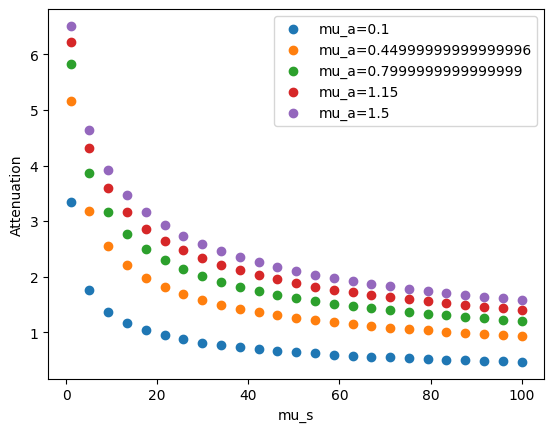

In [29]:
for mu_a in np.linspace(0.1, 1.5, 5):
    attenuation_per_mu_a = []
    for i, mu_s in enumerate(mu_s_vals):
        photon_data = data[f"arr_{i + 2}"]
        photon_ppath = photon_data[0, :]
        photon_nscat = photon_data[1, :]
        photon_weights = np.exp(-mu_a * photon_ppath)
        attenuation = -np.log(np.sum(photon_weights) / nphoton)
        attenuation_per_mu_a.append(attenuation)

    plt.scatter(mu_s_vals, attenuation_per_mu_a, label=f"mu_a={mu_a}")
plt.legend()
plt.xlabel("mu_s")
plt.ylabel("Attenuation")


Same plot but with randomly sampled, then interpolated values for mu_s...

In [38]:
mcs_obj = SimulationAttenuation(data_path)

Text(0, 0.5, 'Attenuation')

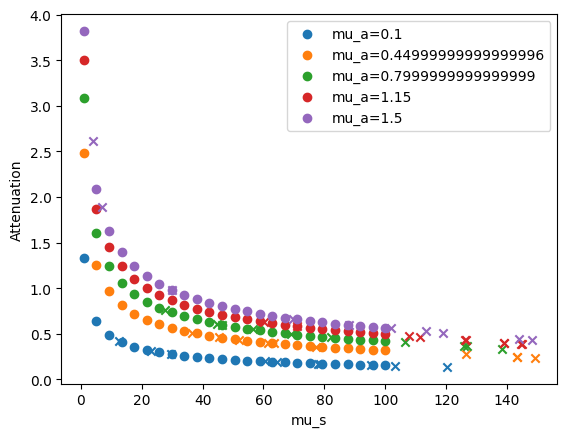

In [40]:
for mu_a in np.linspace(0.1, 1.5, 5):
    attenuation_per_mu_a = []
    for i, mu_s in enumerate(mu_s_vals):
        photon_data = data[f"arr_{i + 2}"]
        photon_ppath = photon_data[0, :]
        photon_nscat = photon_data[1, :]
        photon_weights = np.exp(-mu_a * photon_ppath / 10)
        attenuation = -np.log(np.sum(photon_weights) / nphoton)
        attenuation_per_mu_a.append(attenuation)
    
    p = plt.scatter(mu_s_vals, attenuation_per_mu_a, label=f"mu_a={mu_a}")

    mu_s_vals_sampled = np.random.rand(10) * (mu_s_vals[-1] - mu_s_vals[0]) * 1.5 + mu_s_vals[0]
    attenuation_interpolated =  mcs_obj.A(mu_a, mu_s_vals_sampled)
    plt.scatter(mu_s_vals_sampled, attenuation_interpolated, marker="x", color=p.get_facecolor()[0])

    
plt.legend()
plt.xlabel("mu_s")
plt.ylabel("Attenuation")


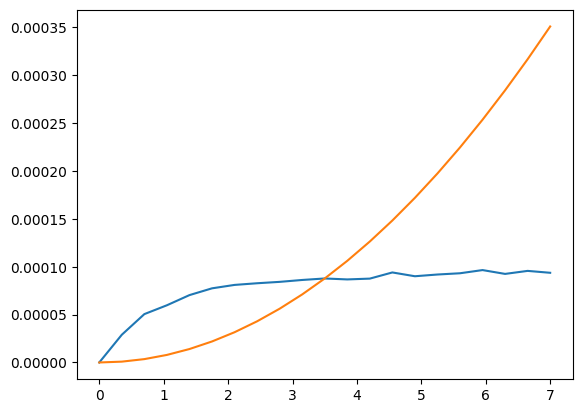

In [134]:
plt.plot(mu_s_vals, dref2)

mu_s_ref = mu_s_vals[len(mu_s_vals) // 2]
k = -mu_s_vals / mu_s_ref
dref_ref = dref2[len(mu_s_vals) // 2]
plt.plot(mu_s_vals, k**2 * dref_ref)

array([10])